In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Examples for how to use functions from BioPlexPy

Import functions from module

In [4]:
import os
# move up to parent directory import functions
os.chdir('/home/rv76/CCB/BioPlexPy')

# data import funcs
from BioPlexPy.data_import_funcs import getBioPlex
from BioPlexPy.data_import_funcs import getGSE122425
from BioPlexPy.data_import_funcs import getCorum

# analysis funcs
from BioPlexPy.analysis_funcs import bioplex2graph
from BioPlexPy.analysis_funcs import get_PPI_network_for_complex
from BioPlexPy.analysis_funcs import get_DataFrame_from_PPI_network
from BioPlexPy.analysis_funcs import get_prop_edges_in_complex_identified
from BioPlexPy.analysis_funcs import permutation_test_for_CORUM_complex

# visualization funcs
from BioPlexPy.visualization_funcs import display_PPI_network_for_complex

# [1] *getBioPlex* - function to retrieve interactions data

### Description

Load BioPlex interactions data - This function loads BioPlex PPI data for cell lines HEK293T and HCT116, note we only have version 1.0 for HCT116 cells.

### Parameters

1) cell_line : str
 - Takes input: '293T' or 'HCT116'
 
 
2) version : str
 - Takes input: '3.0', '1.0' or '2.0'

### Returns

Pandas DataFrame
 - A dataframe with each row corresponding to a PPI interaction.

<ins>Column Descriptions</ins>

GeneA: Entrez Gene ID for the first interacting protein

GeneB: Entrez Gene ID for the second interacting protein

UniprotA: Uniprot ID for the first interacting protein

UniprotB: Uniprot ID for the second interacting protein

SymbolA: Symbol for the first interacting protein

SymbolB: Symbol for the second interacting protein

p(Wrong ID): Probability of wrong protein ID (CompPASS-Plus)

p(NotInteractor): Probability of nonspecific background (CompPASS-Plus)

p(Interactor): Probability of high-confidence interaction (CompPASS-Plus)

### Example 1

Load DataFrames that contain protein-protein interactions from **HEK293T** & **HCT116** cell lines

[Huttlin, E. L., Bruckner, R. J., Navarrete-Perea, J., Cannon, J. R., Baltier, K., Gebreab, F., ... & Gygi, S. P. (2021). Dual proteome-scale networks reveal cell-specific remodeling of the human interactome. Cell, 184(11), 3022-3040.](https://www.sciencedirect.com/science/article/abs/pii/S0092867421004463)

In [8]:
bp_293t = getBioPlex('293T', '3.0')

In [9]:
bp_293t.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,100,728378,P00813,A5A3E0,ADA,POTEF,6.881844e-10,0.000118,0.999882
1,222389,6137,Q8N7W2-2,P26373,BEND7,RPL13,1.340380e-18,0.225664,0.774336
2,222389,5928,Q8N7W2-2,Q09028-3,BEND7,RBBP4,7.221401e-21,0.000064,0.999936
3,222389,25873,Q8N7W2-2,Q9Y3U8,BEND7,RPL36,7.058372e-17,0.128183,0.871817
4,222389,6124,Q8N7W2-2,P36578,BEND7,RPL4,1.632313e-22,0.200638,0.799362


### Example 2

In [10]:
bp_hct116 = getBioPlex('HCT116', '1.0')

In [11]:
bp_hct116.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,88455,50649,Q8IZ07,Q9NR80-4,ANKRD13A,ARHGEF4,3.959215e-04,0.000033,0.999571
1,88455,115106,Q8IZ07,Q96CS2,ANKRD13A,HAUS1,4.488473e-02,0.001935,0.953181
2,88455,23086,Q8IZ07,Q8NEV8-2,ANKRD13A,EXPH5,7.402394e-05,0.000930,0.998996
3,88455,54930,Q8IZ07,Q9H6D7,ANKRD13A,HAUS4,9.180959e-07,0.000128,0.999871
4,88455,79441,Q8IZ07,Q68CZ6,ANKRD13A,HAUS3,8.709394e-07,0.001495,0.998504


# [2] *getGSE122425* - function to retrieve HEK293 RNAseq expression data

### Description

Retrieve HEK293 RNAseq expression data.

### Returns

adata : AnnData object
 - SummarizedExperiment of HEK293 raw count with an added layer storing rpkm.

### Example 1

Load AnnData structure that has mRNA profiles (RNA-seq) of wild type (WT) and NSUN2-/- HEK293 cells that were generated by deep sequencing, in triplicate.

[Effects of NSUN2 deficiency on the mRNA 5-methylcytosine modification and gene expression profile in HEK293 cells (RNA-Seq)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE122425)

In [12]:
HEK293_adata = getGSE122425()

In [13]:
HEK293_adata

AnnData object with n_obs × n_vars = 57905 × 6 
    obs: 'SYMBOL', 'KO', 'GO', 'length'
    layers: 'rpkm'

List rows (observations) that specify **genes**

In [14]:
print(HEK293_adata.obs_names[:10].tolist())

['ENSG00000223972', 'ENSG00000227232', 'ENSG00000243485', 'ENSG00000237613', 'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092', 'ENSG00000238009', 'ENSG00000239945', 'ENSG00000233750']


List columns (variables) that specify whether at **knock-out or wildtype replicates**

In [15]:
print(HEK293_adata.var_names.tolist())

['NK.1', 'NK.2', 'NK.3', 'WT.1', 'WT.2', 'WT.3']


Call matrix with **raw counts**

In [16]:
print(HEK293_adata.X)

[[   0    0    2    1    2    2]
 [ 705  812 1121  732  690  804]
 [   0    0    0    0    0    2]
 ...
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


Call matrix with **rpkm**

In [17]:
print(HEK293_adata.layers["rpkm"])

[[0.   0.   0.01 0.01 0.01 0.01]
 [4.77 5.21 6.8  5.43 5.07 5.39]
 [0.   0.   0.   0.   0.   0.04]
 ...
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]


# [3] *bioplex2graph* - function to convert BioPlex PPIs into a graph data structure

### Description

Convert BioPlex PPIs into a graph - This function converts representation of BioPlex PPIs into a graph data structure representation of BioPlex PPIs in a NetworkX object from NetworkX.

### Parameters

1) DataFrame of PPIs : Pandas DataFrame

### Returns

NetworkX graph
 - A NetworkX graph with Nodes = Uniprot Gene Symbols and Edges = interactions.

### Example 1

1) Obtain the latest version of the 293T PPI network

In [18]:
bp_293t_df = getBioPlex('293T', '3.0')

In [19]:
bp_293t_df.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,100,728378,P00813,A5A3E0,ADA,POTEF,6.881844e-10,0.000118,0.999882
1,222389,6137,Q8N7W2-2,P26373,BEND7,RPL13,1.340380e-18,0.225664,0.774336
2,222389,5928,Q8N7W2-2,Q09028-3,BEND7,RBBP4,7.221401e-21,0.000064,0.999936
3,222389,25873,Q8N7W2-2,Q9Y3U8,BEND7,RPL36,7.058372e-17,0.128183,0.871817
4,222389,6124,Q8N7W2-2,P36578,BEND7,RPL4,1.632313e-22,0.200638,0.799362


2) Turn the data into a graph with NetworkX

In [20]:
bp_293t_G = bioplex2graph(bp_293t_df)

### Example 2 - Examine properties of Network

Analyze nodes in PPI network

In [21]:
len(bp_293t_G.nodes()) # number of nodes

13689

In [22]:
list(bp_293t_G.nodes())[0:5]

['P00813', 'A5A3E0', 'Q8N7W2', 'P26373', 'Q09028']

Call nodes and attributes stored for each node

In [23]:
bp_293t_G.nodes['P00813']

{'entrezid': 100, 'symbol': 'ADA', 'isoform': 'P00813', 'bait': True}

In [24]:
bp_293t_G.nodes['Q8N7W2']

{'entrezid': 222389, 'symbol': 'BEND7', 'isoform': 'Q8N7W2-2', 'bait': True}

Analyze edges in PPI network

In [25]:
len(bp_293t_G.edges()) # number of edges

115868

In [26]:
list(bp_293t_G.edges())[0:5]

[('P00813', 'A5A3E0'),
 ('Q8N7W2', 'P26373'),
 ('Q8N7W2', 'Q09028'),
 ('Q8N7W2', 'Q9Y3U8'),
 ('Q8N7W2', 'P36578')]

Call edges and attributes stored for each edge (PPI)

In [27]:
bp_293t_G.get_edge_data('P00813', 'A5A3E0')

{'pW': 6.881843799526549e-10,
 'pNI': 0.000117635665707004,
 'pInt': 0.9998823636461089}

### Example 3 - Run network algorithms using NetworkX

In [28]:
import networkx as nx
import pandas as pd

Run [pagerank algorithm](https://networkx.guide/algorithms/link-analysis/pagerank/) on network and rank nodes

In [29]:
bp_293t_G_pr = nx.pagerank(bp_293t_G, alpha=0.8)
bp_293t_G_pr = pd.Series(bp_293t_G_pr)
bp_293t_G_pr.sort_values(ascending = False, inplace = True)

In [30]:
bp_293t_G_pr.head(n=5)

P11142    0.002610
P11021    0.002168
Q04917    0.001840
O14556    0.001527
P0CG47    0.001471
dtype: float64

# [4] *getCorum* - function to retrieve CORUM complex data

### Description

Functionality for retrieving the CORUM protein complex data.

### Parameters

1) complex_set : str
 - Takes input 'all' (default), 'core' or 'splice'
 
 
2) organism : str
 - Takes input 'Bovine', 'Dog', 'Hamster', 'Human' (default), 'MINK', 'Mammalia', 'Mouse', 'Pig', 'Rabbit' or 'Rat'

### Returns

Pandas DataFrame
 - A dataframe with each row corresponding to a CORUM complex.

### Example 1

Retrieve **all** CORUM complexes for **Human** 

In [31]:
all_Human_CORUM_df = getCorum()

In [32]:
all_Human_CORUM_df.head(n=3)

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC4,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,B-cell lymphoma 6 protein;Histone deacetylase 4
1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC5,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,B-cell lymphoma 6 protein;Histone deacetylase 5
2,3,BCL6-HDAC7 complex,Human,None,None,P41182;Q8WUI4,604;51564,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC7,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;HDAC7A,B-cell lymphoma 6 protein;Histone deacetylase 7


In [33]:
all_Human_CORUM_df.shape

(2916, 20)

### Example 2

Retrieve the **core** CORUM complexes for **Mouse** 

In [34]:
core_Mouse_CORUM_df = getCorum('core','Mouse')

In [35]:
core_Mouse_CORUM_df.head(n=3)

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
0,9,6S-nuclear aryl hydrocarbon (Ah) receptor liga...,Mouse,None,None,P30561;P53762,11622;11863,MI:0019- coimmunoprecipitation,GO:2001141;GO:0006355;GO:0003677;GO:0023052;GO...,regulation of RNA biosynthetic process;regulat...,11.02.03.04;16.03.01;30.01;34.11.03;70.10,transcriptional control;DNA binding;cellular s...,;None,"Arnt contains a basic helix-loop-helix motif, ...",None,Mus musculus (Mouse);Mus musculus (Mouse),None,Ahr;Arnt,1317062,Aryl hydrocarbon receptor ;Aryl hydrocarbon re...
1,25,9S-cytosolic aryl hydrocarbon (Ah) receptor no...,Mouse,None,None,O08915;P07901;P11499;P30561,11632;15519;15516;11622,MI:0019- coimmunoprecipitation; MI:0030- cross...,GO:0006950;GO:0009593;GO:0042221;GO:0005737,response to stress;detection of chemical stimu...,32.01;34.11.03;70.03,stress response;chemoperception and response;c...,;Hsp86 Hsp86-1 Hspca;Hsp84 Hsp84-1 Hspcb;,The authors propose that the AhR exists in cyt...,None,Mus musculus (Mouse);Mus musculus (Mouse);Mus ...,None,Aip;Hsp90aa1;Hsp90ab1;Ahr,1310021,AH receptor-interacting protein ;Heat shock pr...
2,39,Immunoproteasome,Mouse,20S immunoproteasome; proteasome,None,O09061;O35955;O70435;P28063;P28076;P49722;P990...,19170;19171;19167;16913;16912;19166;19172;2644...,MI:0019-coimmunoprecipitation,GO:0016485;GO:0043161;GO:0006511;GO:0006950;GO...,protein processing;proteasome-mediated ubiquit...,14.07.11;14.13.01.01;32.01;36.25.16.03.05;70.0...,protein processing (proteolytic);proteasomal d...,None;Lmp10 Mecl1;None;Lmp7 Mc13;Lmp2 Ring12;Lm...,The proteasome is an essential component of th...,None,Mus musculus (Mouse);Mus musculus (Mouse);Mus ...,None,Psmb1;Psmb10;Psma3;Psmb8;Psmb9;Psma2;Psmb4;Psm...,10436176,Proteasome subunit beta type-1;Proteasome subu...


In [36]:
core_Mouse_CORUM_df.shape

(540, 20)

# [5] *get_PPI_network_for_complex* - that returns matching edges (PPI data) for a given CORUM complex as a sub-graph

### Description

This function returns a subgraph of PPIs identified through AP-MS between the proteins in a specified CORUM complex.

### Parameters

1) Network of PPIs : NetworkX graph
 
2) DataFrame of CORUM complexes : Pandas DataFrame

3) Corum Complex ID: int

### Returns

NetworkX Graph
 - A subgraph induced by the proteins in a CORUM complex from the BioPlex network used as input.

### Example 1

1) Obtain the latest version of the **293T** PPI network

In [37]:
bp_293t_df = getBioPlex('293T', '3.0')

2) Obtain NetworkX graph representation of 293T PPI network

In [38]:
bp_293t_G = bioplex2graph(bp_293t_df)

3) Obtain **core** CORUM complexes for **Human**

In [39]:
Corum_DF = getCorum('core', 'Human')

4) Get edges detected via AP-MS for **ING2** complex from HEK293T cell line PPI data version 3.0 (**ING2 complex** ID: 2851)

In [40]:
ING2_bp_293t_G = get_PPI_network_for_complex(bp_293t_G, Corum_DF, 2851)

In [41]:
len(list(ING2_bp_293t_G.edges))

51

### Example 2

Get edges detected via AP-MS for **BCOR** complex from HEK293T cell line PPI data version 3.0 (**BCOR complex** ID: 1178)

In [42]:
BCOR_bp_293t_G = get_PPI_network_for_complex(bp_293t_G, Corum_DF, 1178)

In [43]:
len(list(BCOR_bp_293t_G.edges))

14

# [6] *get_DataFrame_from_PPI_network* - that takes an AP-MS graph (NetworkX) and returns a dataframe of PPIs (Edges)

### Description

This function returns a DataFrame of PPIs (identified through AP-MS) represented as a graph.

### Parameters

1) Network of PPIs : NetworkX graph

### Returns

Pandas DataFrame
 - A DataFrame of edges (AP-MS interactions) from a network.

### Example 1

1) Obtain the latest version of the **293T** PPI network

In [44]:
bp_293t_df = getBioPlex('293T', '3.0')

2) Obtain NetworkX graph representation of 293T PPI network

In [45]:
bp_293t_G = bioplex2graph(bp_293t_df)

3) Obtain **core** CORUM complexes for **Human**

In [46]:
Corum_DF = getCorum('core', 'Human')

4) Get edges detected via AP-MS for **ING2** complex from HEK293T cell line PPI data version 3.0 (**ING2 complex** ID: 2851)

In [47]:
ING2_bp_293t_G = get_PPI_network_for_complex(bp_293t_G, Corum_DF, 2851)

5) Convert **ING2** AP-MS network into DataFrame w/ each row corresponding to an edge

In [48]:
ING2_bp_293t_df = get_DataFrame_from_PPI_network(ING2_bp_293t_G)

In [49]:
ING2_bp_293t_df.head()

,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,Q9H7L9,Q96ST3,SUDS3,SIN3A,1.147993e-10,0.000510,0.999490
1,Q9HCU9,Q16576,BRMS1,RBBP7,3.046638e-30,0.000001,0.999999
2,Q9HCU9,Q09028,BRMS1,RBBP4,4.715386e-29,0.000138,0.999862
3,Q9HCU9,Q13547,BRMS1,HDAC1,1.821999e-21,0.000021,0.999979
4,O75446,Q92769,SAP30,HDAC2,7.905015e-17,0.051392,0.948608


In [50]:
ING2_bp_293t_df.shape

(51, 7)

### Example 2

4) Get edges detected via AP-MS for **BCOR** complex from HEK293T cell line PPI data version 3.0 (**BCOR complex** ID: 1178)

In [51]:
BCOR_bp_293t_G = get_PPI_network_for_complex(bp_293t_G, Corum_DF, 1178)

5) Convert **BCOR** AP-MS network into DataFrame w/ each row corresponding to an edge

In [52]:
BCOR_bp_293t_df = get_DataFrame_from_PPI_network(BCOR_bp_293t_G)

In [53]:
BCOR_bp_293t_df.head()

,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,Q8N488,Q6W2J9,RYBP,BCOR,7.826500e-15,2.278487e-05,0.999977
1,Q8N488,Q8NHM5,RYBP,KDM2B,6.317298e-12,8.750762e-07,0.999999
2,Q8N488,Q99496,RYBP,RNF2,4.235077e-15,8.273935e-05,0.999917
3,Q8N488,Q06587,RYBP,RING1,1.383578e-11,8.939727e-04,0.999106
4,P63208,Q8NHM5,SKP1,KDM2B,1.653213e-09,1.353456e-07,1.000000


In [54]:
BCOR_bp_293t_df.shape

(14, 7)

# [7] *get_prop_edges_in_complex_identified* - function that returns the proportion of interactions between proteins in a CORUM complex detected by AP-MS

### Description

This function returns the proportion of all possible PPIs identified through AP-MS between the proteins in a specified CORUM complex.

### Parameters

1) DataFrame of PPIs : Pandas DataFrame
 
2) DataFrame of CORUM complexes : Pandas DataFrame

3) Corum Complex ID: int

### Returns

Float
 - The proportion of interactions between all proteins in CORUM complex identified through AP-MS PPI data.

### Example 1

1) Obtain the latest version of the **293T** PPI network

In [55]:
bp_293t_df = getBioPlex('293T', '3.0')

2) Obtain NetworkX graph representation of **293T** PPI network

In [56]:
bp_293t_G = bioplex2graph(bp_293t_df)

3) Obtain **core** CORUM complexes for **Human**

In [57]:
Corum_DF = getCorum('core', 'Human')

4) Get proportion of interactions identified for **ING2** complex from HEK293T cell line PPI data version 3.0 (**ING2 complex** ID: 2851)

In [58]:
get_prop_edges_in_complex_identified(bp_293t_G, Corum_DF, 2851)

0.654

### Example 2

4) Get proportion of interactions identified for **Arp2/3** complex from HEK293T cell line PPI data version 3.0 (**Arp2/3 complex** ID: 27)

In [59]:
get_prop_edges_in_complex_identified(bp_293t_G, Corum_DF, 27)

0.667

# [8] *permutation_test_for_CORUM_complex* - function that runs permutation test to test whether number of edges for CORUM complex PPI network is enriched for interactions

### Description

This function returns a p-value after running a permutation test by 
1. taking the number of proteins in the specified CORUM complex (N)
2. choosing N random proteins from the Graph generated by all of the PPI data (G)
3. calculating the number of edges in the Subgraph (S) induced by N random proteins (with the same proportion of baits (+/- 10%) as the CORUM complex) and storing this value (E_i)
4. repeating steps 1-3 num_perms times to create a null distribution
5. calculating the number of edges between N proteins in the CORUM complex (E)
6. returning a p-value by calculating the proportion of values [E_1, E_2, ... , E_num_perms] that are greater than or equal to E.

### Parameters

1) Network of PPIs : NetworkX graph
 
2) DataFrame of CORUM complexes : Pandas DataFrame

3) Corum Complex ID: int

4) Number of Permutations: int

### Returns

Float
 - A p-value from a permutation test to check for enrichment of PPIs detected between proteins of CORUM complex

### Example 1

1) Obtain the latest version of the **293T** PPI network

In [60]:
bp_293t_df = getBioPlex('293T', '3.0')

2) Obtain NetworkX graph representation of 293T PPI network

In [61]:
bp_293t_G = bioplex2graph(bp_293t_df)

3) Obtain **core** CORUM complexes for **Human**

In [62]:
Corum_DF = getCorum('core', 'Human')

4) Calculate p-value to check for enrichment of edges in **Arp2/3** complex from HEK293T cell line PPI data version 3.0 (**Arp2/3 complex** ID: 27)

In [63]:
permutation_test_for_CORUM_complex(bp_293t_G, Corum_DF, 27, 1000)

0.000999000999000999

### Example 2

4) Calculate p-value to check for enrichment of edges in **ING2** complex from HEK293T cell line PPI data version 3.0 (**ING2 complex** ID: 2851)

In [64]:
permutation_test_for_CORUM_complex(bp_293t_G, Corum_DF, 2851, 1000)

0.000999000999000999

### Example 3 - iterate through all CORUM complexes and run permutation test on each one using *PPI 293T v3* data

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

For each CORUM complex tested:
- complex has $\ge 3$ genes in it
- check that at least one of the genes in complex was targeted as a bait
- check to see that CORUM complex has at least 1 edge detected in PPI data

Note: permutation test "lags" when the proportion of baits for a CORUM complex < 10%, more permutations of random sub-graphs that don't satisfy that low number of baits get discarded from p-value calculation

In [66]:
Corum_DF.head(n=2)

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),None,BCL6;HDAC4,11929873,B-cell lymphoma 6 protein;Histone deacetylase 4
1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),None,BCL6;HDAC5,11929873,B-cell lymphoma 6 protein;Histone deacetylase 5


In [67]:
Corum_DF.shape

(2417, 20)

Running this for every complex takes a couple minutes to run, to speed up RunTime we'll set $\text{num_perms} = 100$

In [17]:
permutation_pvals_CORUM_complex_dict = {}

# get set of baits from PPI data
bp_i_baits = set(bp_293t_df.UniprotA)

count_i = 0
for CORUM_complex_ID in Corum_DF.ComplexID:
    
    # check to see if CORUM complex has >= 3 genes in it
    genes_in_complex_i = Corum_DF[Corum_DF.ComplexID == CORUM_complex_ID].loc[:,'subunits(UniProt IDs)'].values[0].split(';')
    if len(genes_in_complex_i) >= 3:
        
        # check to see that at least one of the genes was targeted as a bait
        genes_as_baits_bool = np.array([gene_i in bp_i_baits for gene_i in genes_in_complex_i])
        if np.sum(genes_as_baits_bool) >= 1:
            
            # check to see that CORUM complex has at least 1 edge
            CORUM_complex_G = get_PPI_network_for_complex(bp_293t_G, Corum_DF, CORUM_complex_ID)
            if len(list(CORUM_complex_G.edges)) >= 1:

                permutation_pvals_CORUM_complex_dict[CORUM_complex_ID] = permutation_test_for_CORUM_complex(bp_293t_G, Corum_DF, CORUM_complex_ID, 100)
    
    count_i += 1
    if count_i % 1000 == 0:
        print(count_i)
        
permutation_pvals_CORUM_complex_series = pd.Series(permutation_pvals_CORUM_complex_dict)

1000
2000


In [18]:
len(permutation_pvals_CORUM_complex_series) # number of CORUM complexes actually tested

1023

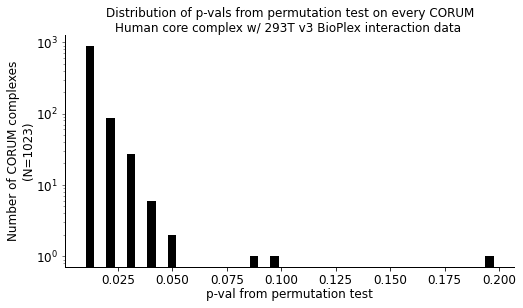

In [19]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=1.0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()

ax.hist(permutation_pvals_CORUM_complex_series, bins = 40, rwidth = 0.85, color = 'black')
ax.set_yscale('log')

ax.set_title('Distribution of p-vals from permutation test on every CORUM\nHuman core complex w/ 293T v3 BioPlex interaction data ', fontsize = 12, color = 'k', pad = -15)
ax.set_ylabel(f'Number of CORUM complexes\n(N={len(permutation_pvals_CORUM_complex_series)})', fontsize = 12, color = 'k', labelpad = 1)
ax.set_xlabel('p-val from permutation test' , fontsize = 12, color = 'k', labelpad = 1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(7.5, 4.5)
fig.tight_layout()

plt.show()

In [20]:
permutation_pvals_CORUM_complex_series.sort_values(ascending = True, inplace = True)
permutation_pvals_CORUM_complex_series.head()

12      0.009901
5531    0.009901
5544    0.009901
5545    0.009901
5546    0.009901
dtype: float64

In [57]:
permutation_pvals_CORUM_complex_series.tail(n=15)

5273    0.029703
2054    0.029703
3054    0.029703
5550    0.029703
6302    0.039604
5177    0.039604
2603    0.039604
785     0.039604
7311    0.039604
280     0.039604
49      0.049505
7194    0.049505
7557    0.089109
5613    0.099010
5615    0.198020
dtype: float64

### Example 4 - differential enrichment between PPI networks
Run permutation test on some of the same complexes for BioPlex HEK293T v1, v2 & v3 PPI networks

In [68]:
# 293T v1 PPI network
bp_293t_v1_df = getBioPlex('293T', '1.0')
bp_293t_v1_G = bioplex2graph(bp_293t_v1_df)

# 293T v2 PPI network
bp_293t_v2_df = getBioPlex('293T', '2.0')
bp_293t_v2_G = bioplex2graph(bp_293t_v2_df)

# 293T v3 PPI network
bp_293t_v3_df = getBioPlex('293T', '3.0')
bp_293t_v3_G = bioplex2graph(bp_293t_v3_df)

**Arp2/3** complex from HEK293T cell line PPI data version 1.0, 2.0 & 3.0  (**Arp2/3 complex** ID: 27)

In [69]:
permutation_test_for_CORUM_complex(bp_293t_v1_G, Corum_DF, 27, 1000)

0.000999000999000999

In [70]:
permutation_test_for_CORUM_complex(bp_293t_v2_G, Corum_DF, 27, 1000)

0.000999000999000999

In [71]:
permutation_test_for_CORUM_complex(bp_293t_v3_G, Corum_DF, 27, 1000)

0.000999000999000999

 **ING2** complex from HEK293T cell line PPI data version 1.0, 2.0 & 3.0  (**ING2 complex** ID: 2851)

In [72]:
permutation_test_for_CORUM_complex(bp_293t_v1_G, Corum_DF, 2851, 1000)

0.000999000999000999

In [73]:
permutation_test_for_CORUM_complex(bp_293t_v2_G, Corum_DF, 2851, 1000)

0.000999000999000999

In [74]:
permutation_test_for_CORUM_complex(bp_293t_v3_G, Corum_DF, 2851, 1000)

0.000999000999000999

**CASP8-FADD-MALT1-BCL10** complex from HEK293T cell line PPI data version 1.0, 2.0 & 3.0  (**CASP8-FADD-MALT1-BCL10 complex** ID: 2054)

In [75]:
permutation_test_for_CORUM_complex(bp_293t_v1_G, Corum_DF, 2054, 1000)

ERROR: no edges detected in PPI data for this CORUM complex, p-value could not be computed.


In [76]:
permutation_test_for_CORUM_complex(bp_293t_v2_G, Corum_DF, 2054, 1000)

ERROR: no edges detected in PPI data for this CORUM complex, p-value could not be computed.


In [77]:
permutation_test_for_CORUM_complex(bp_293t_v3_G, Corum_DF, 2054, 1000)

0.00999000999000999

# [9] *display_PPI_network_for_complex* - function to visualize PPI data for a given complex from CORUM

### Description

Display network of BioPlex PPIs for a CORUM complex - This function displays a complete network in which nodes represent the proteins in a specified CORUM complex and edges represent BioPlex PPIs using NetworkX. Edges detected through AP-MS are colored darker.

See [Huttlin, E. L., Bruckner, R. J., Navarrete-Perea, J., Cannon, J. R., Baltier, K., Gebreab, F., ... & Gygi, S. P. (2021). Dual proteome-scale networks reveal cell-specific remodeling of the human interactome. Cell, 184(11), 3022-3040.](https://www.sciencedirect.com/science/article/abs/pii/S0092867421004463) for reference.

### Parameters

1) ax object to draw on: Matplotlib Axes


2) DataFrame of PPIs : Pandas DataFrame
    

3) DataFrame of CORUM complexes : Pandas DataFrame


4) Corum Complex ID: int


5) Size of Nodes in Network: int


6) Width of Edges in Network: float


7) **optional** Size of font for Node Labels: int

    
8) **optional** Color of Nodes targeted as baits: str


9) **optional** Color of Nodes detected as preys only: str


10) **optional** Color of Edges observed via AP-MS from PPI data: str


11) **optional** NetworkX Position of Nodes: dict

### Returns

Node Positions
 - Dictionary of Node Positions in NetworkX layout.

### Example 1

In [78]:
import matplotlib.pyplot as plt

1) Obtain the latest version of the **293T** PPI network

In [79]:
bp_293t_df = getBioPlex('293T', '3.0')

2) Obtain **core** CORUM complexes for **Human**

In [80]:
Corum_DF = getCorum('core', 'Human')

3) Visualize network for specified protein complex using PPI data (**ING2 complex** ID: 2851)

**ING2** complex from HEK293T cell line PPI data version 3.0

In [81]:
Corum_DF[Corum_DF.ComplexName == 'ING2 complex']

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
920,2851,ING2 complex,Human,None,HeLa S3 cells,A0A024R3R1;O75446;P29374;Q09028;Q13547;Q16576;...,51742;8819;5926;5928;3065;5931;84312;3066;2594...,MI:0069-mass spectrometry studies of complexes...,GO:0006265;GO:0000278;GO:0051726;GO:0006473;GO...,DNA topological change;mitotic cell cycle;regu...,10.01.09.05;10.03.01.01;10.03.01;14.07.04;40.1...,DNA conformation modification (e.g. chromatin)...,"hCG_19319;None;RBBP1, RBP1;RBAP48;RPD3L1;RBAP4...",ING2 is in an HDAC complex similar to ING1.ING...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,None,ARID4B;SAP30;ARID4A;RBBP4;HDAC1;RBBP7;BRMS1L;H...,16387653,"AT rich interactive domain 4B (RBP1-like), iso..."


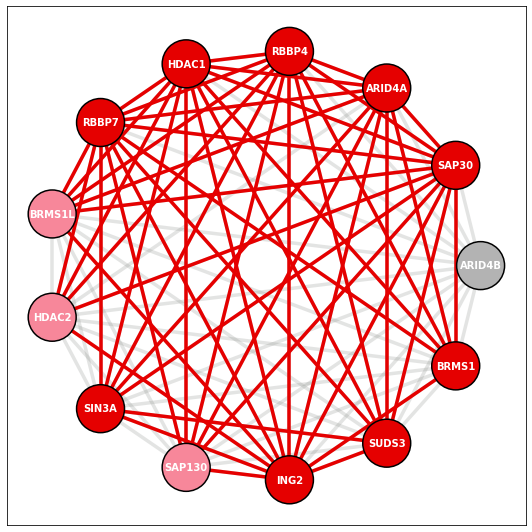

In [82]:
fig, ax = plt.subplots()

ING2_node_layout = display_PPI_network_for_complex(ax, bp_293t_df, Corum_DF, 2851, 2300, 3.5)

fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)
fig.tight_layout()

# save figure as PNG
fig_out_path = '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_293T_3.0_ING2-complex.png'
plt.savefig(fig_out_path, bbox_inches='tight', dpi = 300 , transparent = True)
plt.show()

### Example 2

**Arp2/3** complex from HEK293T cell line PPI data version 3.0

In [83]:
Corum_DF[Corum_DF.ComplexName == 'Arp2/3 protein complex']

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
9,27,Arp2/3 protein complex,Human,ARP2/3 protein complex,None,O15143;O15144;O15145;O15511;P59998;P61158;P61160,10095;10109;10094;10092;10093;10096;10097,MI:0027-cosedimentation;MI:0071-molecular sieving,None,None,None,None,ARC41;ARC34;ARC21;ARC16;ARC20;ARP3;ARP2,None,"Transcript levels of ARP2/3 complex subunits, ...",Homo sapiens (Human);Homo sapiens (Human);Homo...,None,ARPC1B;ARPC2;ARPC3;ARPC5;ARPC4;ACTR3;ACTR2,9359840,Actin-related protein 2/3 complex subunit 1B;A...


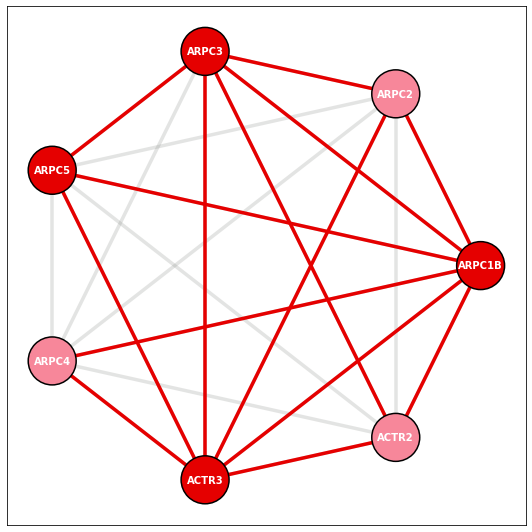

In [84]:
fig, ax = plt.subplots()

Arp23_node_layout = display_PPI_network_for_complex(ax, bp_293t_df, Corum_DF, 27, 2300, 3.5)

fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)
fig.tight_layout()

# save figure as PNG
fig_out_path = '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_293T_3.0_Arp2-3-complex.png'
plt.savefig(fig_out_path, bbox_inches='tight', dpi = 300 , transparent = True)
plt.show()

### Example 3

In [85]:
from matplotlib import gridspec

**COP9 Signalsome** complex from *HCT116 cell line PPI data version 1.0* & *HEK293T cell line PPI data version 3.0*

In [86]:
Corum_DF[Corum_DF.ComplexName == 'COP9 signalosome complex']

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
655,2174,COP9 signalosome complex,Human,"JAB1-containing signalosome (GPS1, COPS2, COPS...",None,P61201;Q13098;Q7L5N1;Q92905;Q99627;Q9BT78;Q9UB...,9318;2873;10980;10987;10920;51138;50813;8533,MI:0047-far western blotting,GO:2001141;GO:0006355;GO:0007165;GO:0009583;GO...,regulation of RNA biosynthetic process;regulat...,11.02.03.04;30;34.11.01,transcriptional control;CELLULAR COMMUNICATION...,"CSN2, TRIP15;COPS1, CSN1;CSN6, HVIP;CSN5, JAB1...","The purified complex is very similar, if not i...",None,Homo sapiens (Human);Homo sapiens (Human);Homo...,"Since the authors did not specify COP7, we use...",COPS2;GPS1;COPS6;COPS5;COPS8;COPS4;COPS7A;COPS3,9535219,COP9 signalosome complex subunit 2;COP9 signal...


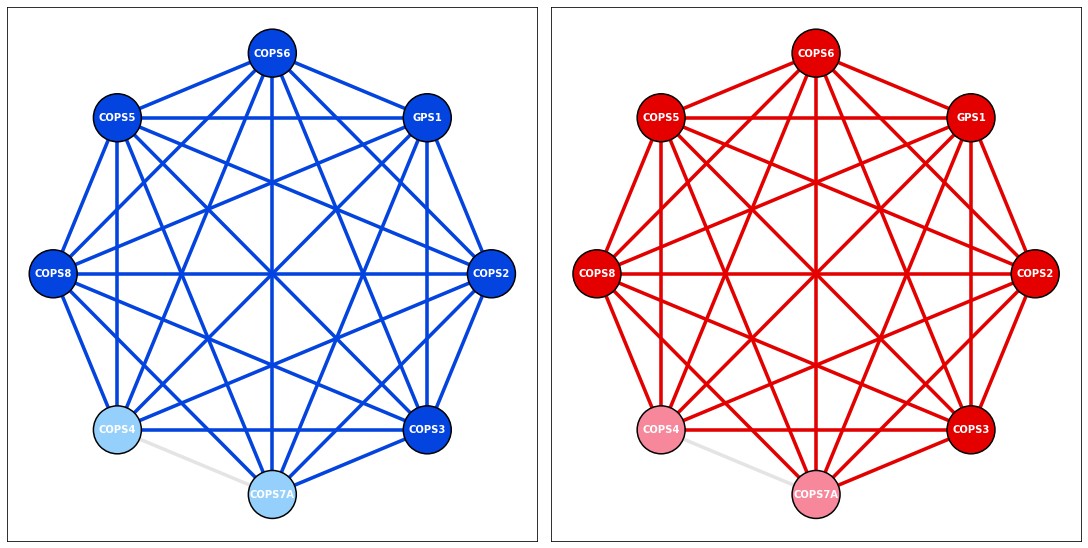

In [87]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig) # define 2 columns since we'll have two networks
spec.update(wspace=0.025) # set the spacing between axes.

# HCT116 1.0
ax_HCT116_v1 = fig.add_subplot(spec[0]) # create axes object for HCT116 v1 network
bp_HCT116_v1_PPI_df = getBioPlex('HCT116', '1.0') # load PPI data for HCT116 v1
COP9_node_layout = display_PPI_network_for_complex(ax_HCT116_v1, bp_HCT116_v1_PPI_df, Corum_DF, 2174, 2300, 3.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue')

# HEK293T 3.0
ax_293T_v3 = fig.add_subplot(spec[1]) # create axes object for HEK293T v3 network
bp_293T_v3_df = getBioPlex('293T', '3.0') # load PPI data for HEK293T v3
COP9_node_layout = display_PPI_network_for_complex(ax_293T_v3, bp_293T_v3_df, Corum_DF, 2174, 2300, 3.5, node_pos=COP9_node_layout)

fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

# save figure as PNG
fig_out_path = '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_HCT116_1.0_VS_293T_3.0_COP9-signalsome-complex.png'
plt.savefig(fig_out_path, bbox_inches='tight', dpi = 300 , transparent = True)
plt.show()

### Example 4

**Fanconi Anemia Core** complex from *HCT116 cell line PPI data version 1.0* & *HEK293T cell line PPI data version 3.0*

In [88]:
Corum_DF[Corum_DF.ComplexName == 'FA core complex 1 (Fanconi anemia core complex 1)']

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
607,1623,FA core complex 1 (Fanconi anemia core complex 1),Human,None,None,O15287;O15360;Q00597;Q9HB96;Q9NPI8,2189;2175;2176;2178;2188,MI:0027-cosedimentation,GO:0016567;GO:0006974;GO:0005634,protein ubiquitination;cellular response to DN...,14.07.05;32.01.09;70.10,"modification by ubiquitination, deubiquitinati...",XRCC9;FAA FACA FANCH;FAC FACC;FACE;None,FANCE functions to target cytoplasmic FANCC to...,FA complex is involved in Fanconi anemia (FA) ...,Homo sapiens (Human);Homo sapiens (Human);Homo...,None,FANCG;FANCA;FANCC;FANCE;FANCF,12093742,Fanconi anemia group G protein;Fanconi anemia ...


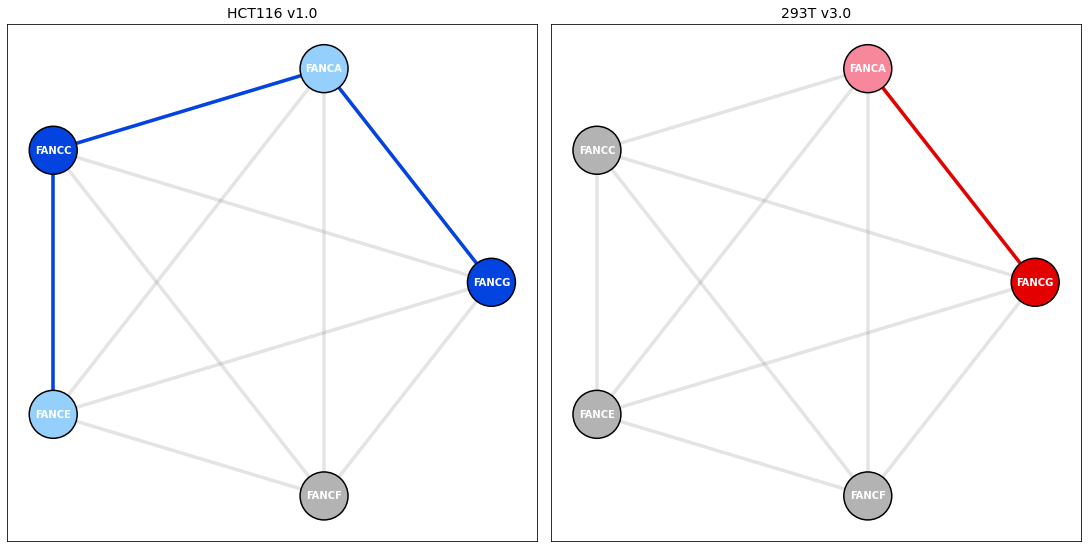

In [89]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig) # define 2 columns since we'll have two networks
spec.update(wspace=0.025) # set the spacing between axes.

# HCT116 1.0
ax_HCT116_v1 = fig.add_subplot(spec[0]) # create axes object for HCT116 v1 network
bp_HCT116_v1_PPI_df = getBioPlex('HCT116', '1.0') # load PPI data for HCT116 v1
Fanconi_Anemia_node_layout = display_PPI_network_for_complex(ax_HCT116_v1, bp_HCT116_v1_PPI_df, Corum_DF, 1623, 2300, 3.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue')
ax_HCT116_v1.set_title('HCT116 v1.0', color = 'black', fontsize = 14) # set title

# HEK293T 3.0
ax_293T_v3 = fig.add_subplot(spec[1]) # create axes object for HEK293T v3 network
bp_293T_v3_df = getBioPlex('293T', '3.0') # load PPI data for HEK293T v3
Fanconi_Anemia_node_layout = display_PPI_network_for_complex(ax_293T_v3, bp_293T_v3_df, Corum_DF, 1623, 2300, 3.5, node_pos = Fanconi_Anemia_node_layout)
ax_293T_v3.set_title('293T v3.0', color = 'black', fontsize = 14) # set title

fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

# save figure as PNG
fig_out_path = '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_HCT116_1.0_VS_293T_3.0_Fanconi-Anemia-core-complex.png'
plt.savefig(fig_out_path, bbox_inches='tight', dpi = 300 , transparent = True)
plt.show()

### Example 5 - Recreate *Figure 1* from *Cell* 2021 BioPlex 3.0 paper

**Exosome** complex

In [90]:
Corum_DF[Corum_DF.ComplexID == 7443]

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
2347,7443,Exosome,Human,None,HeLa cells,Q01780;Q06265;Q13868;Q15024;Q5RKV6;Q8TF46;Q96B...,5394;5393;23404;23016;118460;115752;11340;1020...,MI:0004-affinity chromatography technologies;M...,GO:0004532;GO:0006401;GO:0005737,exoribonuclease activity;RNA catabolic process...,01.03.16.01;70.03,RNA degradation;cytoplasm,PMSCL PMSCL2 RRP6;PMSCL1;RRP4;KIAA0116 RRP42;M...,None,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,None,EXOSC10;EXOSC9;EXOSC2;EXOSC7;EXOSC6;DIS3L;EXOS...,20531389,Exosome component 10;Exosome complex component...


**BCOR** complex

In [91]:
Corum_DF[Corum_DF.ComplexID == 1178]

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
520,1178,BCOR complex,Human,Ubiquitin E3 ligase,None,P11142;P63208;Q06587;Q6W2J9;Q8N488;Q8NHM5;Q994...,3312;6500;6015;54880;23429;84678;6045;84759,MI:0019-coimmunoprecipitation,GO:0016567;GO:0005634;GO:0006511;GO:0016569;GO...,protein ubiquitination;nucleus;ubiquitin-depen...,14.07.05;70.10;14.13.01.01;11,"modification by ubiquitination, deubiquitinati...","HSC70, HSP73, HSPA10;EMC19, OCP2, SKP1A, TCEB1...",Ubiquitin E3 ligases covalently attach ubiquit...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,None,HSPA8;SKP1;RING1;BCOR;RYBP;KDM2B;RNF2;PCGF1,16943429,Heat shock cognate 71 kDa protein;S-phase kina...


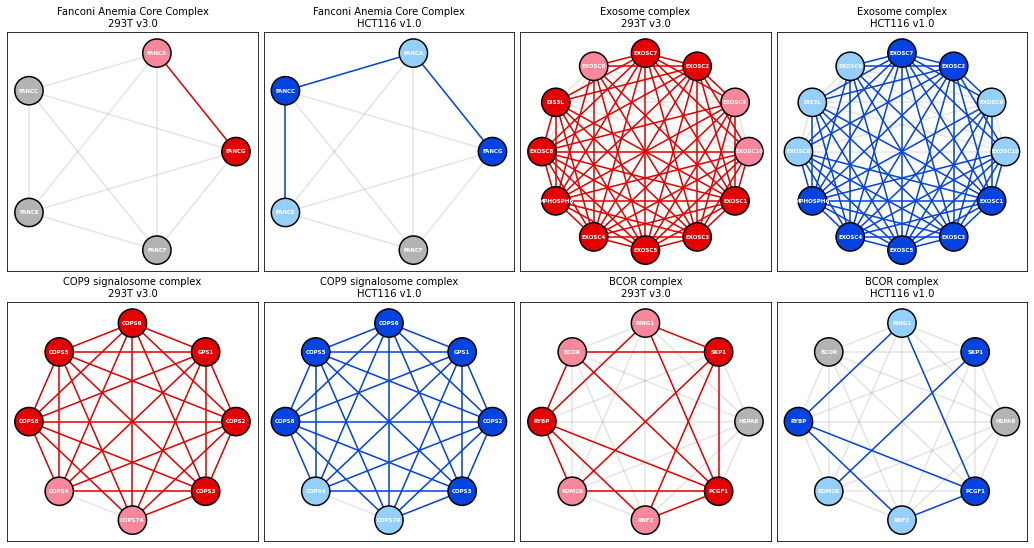

In [92]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=4, nrows=2, figure=fig) # define 2 columns since we'll have two networks
spec.update(wspace=0.01,hspace=0.01) # set the spacing between axes.

# HEK293T 3.0 - create axes objects for HEK293T v3 network
ax_293T_v3_A = fig.add_subplot(spec[0,0])
ax_293T_v3_C = fig.add_subplot(spec[0,2])
ax_293T_v3_E = fig.add_subplot(spec[1,0])
ax_293T_v3_G = fig.add_subplot(spec[1,2])

bp_293T_v3_df = getBioPlex('293T', '3.0') # load PPI data for HEK293T v3

Fanconi_Anemia_node_layout = display_PPI_network_for_complex(ax_293T_v3_A, bp_293T_v3_df, Corum_DF, 1623, 800, 1.5, node_font_size=5.5)
Exosome_node_layout = display_PPI_network_for_complex(ax_293T_v3_C, bp_293T_v3_df, Corum_DF, 7443, 800, 1.5, node_font_size=5.5)
COP9_node_layout = display_PPI_network_for_complex(ax_293T_v3_E, bp_293T_v3_df, Corum_DF, 2174, 800, 1.5, node_font_size=5.5)
BCOR_node_layout = display_PPI_network_for_complex(ax_293T_v3_G, bp_293T_v3_df, Corum_DF, 1178, 800, 1.5, node_font_size=5.5)

# set titles
ax_293T_v3_A.set_title('Fanconi Anemia Core Complex\n293T v3.0', color = 'black', fontsize = 10)
ax_293T_v3_C.set_title('Exosome complex\n293T v3.0', color = 'black', fontsize = 10)
ax_293T_v3_E.set_title('COP9 signalosome complex\n293T v3.0', color = 'black', fontsize = 10)
ax_293T_v3_G.set_title('BCOR complex\n293T v3.0', color = 'black', fontsize = 10)

# HCT116 1.0 - create axes object for HCT116 v1 network
ax_HCT116_v1_B = fig.add_subplot(spec[0,1])
ax_HCT116_v1_D = fig.add_subplot(spec[0,3])
ax_HCT116_v1_F = fig.add_subplot(spec[1,1])
ax_HCT116_v1_H = fig.add_subplot(spec[1,3])

bp_HCT116_v1_df = getBioPlex('HCT116', '1.0') # load PPI data for HCT116 v1

Fanconi_Anemia_node_layout = display_PPI_network_for_complex(ax_HCT116_v1_B, bp_HCT116_v1_df, Corum_DF, 1623, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue', node_pos=Fanconi_Anemia_node_layout)
Exosome_node_layout = display_PPI_network_for_complex(ax_HCT116_v1_D, bp_HCT116_v1_df, Corum_DF, 7443, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue', node_pos=Exosome_node_layout)
COP9_node_layout = display_PPI_network_for_complex(ax_HCT116_v1_F, bp_HCT116_v1_df, Corum_DF, 2174, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue', node_pos=COP9_node_layout)
BCOR_node_layout = display_PPI_network_for_complex(ax_HCT116_v1_H, bp_HCT116_v1_df, Corum_DF, 1178, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue', node_pos=BCOR_node_layout)

# set titles
ax_HCT116_v1_B.set_title('Fanconi Anemia Core Complex\nHCT116 v1.0', color = 'black', fontsize = 10)
ax_HCT116_v1_D.set_title('Exosome complex\nHCT116 v1.0', color = 'black', fontsize = 10)
ax_HCT116_v1_F.set_title('COP9 signalosome complex\nHCT116 v1.0', color = 'black', fontsize = 10)
ax_HCT116_v1_H.set_title('BCOR complex\nHCT116 v1.0', color = 'black', fontsize = 10)

fig = plt.gcf()
fig.set_size_inches(14.25, 7.5)
fig.tight_layout()

# save figure as PNG
fig_out_path = '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_HCT116_1.0_VS_293T_3.0_Fig1_Cell2021.png'
plt.savefig(fig_out_path, bbox_inches='tight', dpi = 300 , transparent = False)
plt.show()

### Example 6 - Recreate *Figure 2* from *Nature* 2017 BioPlex 2.0 paper & include HEK293 v3 PPI data

**Arp2/3** complex

In [93]:
Corum_DF[Corum_DF.ComplexID == 27]

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
9,27,Arp2/3 protein complex,Human,ARP2/3 protein complex,None,O15143;O15144;O15145;O15511;P59998;P61158;P61160,10095;10109;10094;10092;10093;10096;10097,MI:0027-cosedimentation;MI:0071-molecular sieving,None,None,None,None,ARC41;ARC34;ARC21;ARC16;ARC20;ARP3;ARP2,None,"Transcript levels of ARP2/3 complex subunits, ...",Homo sapiens (Human);Homo sapiens (Human);Homo...,None,ARPC1B;ARPC2;ARPC3;ARPC5;ARPC4;ACTR3;ACTR2,9359840,Actin-related protein 2/3 complex subunit 1B;A...


**TFIIH transcription factor** complex

In [94]:
Corum_DF[Corum_DF.ComplexID == 1029]

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
430,1029,TFIIH transcription factor complex,Human,None,None,P18074;P19447;P32780;P50613;P51946;P51948;Q138...,2068;2071;2965;1022;902;4331;2966;2967;404672;...,MI:0091-chromatography technologies;MI:0071-mo...,GO:0006281;GO:0007049;GO:0006355;GO:0005634;GO...,DNA repair;cell cycle;regulation of transcript...,10.01.05.01;10.03;11.02.03.04;70.10,DNA repair;cell cycle;transcriptional control;...,"XPD, XPDC;XPB, XPBC;BTF2;CAK, CAK1, CDKN7, MO1...",Transcription factor IIH (TFIIH) is a multisub...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,None,ERCC2;ERCC3;GTF2H1;CDK7;CCNH;MNAT1;GTF2H2;GTF2...,8692842,TFIIH basal transcription factor complex helic...


**Checkpoint RAD** complex

In [95]:
Corum_DF[Corum_DF.ComplexID == 274]

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
116,274,9-1-1-RAD17-RFC complex,Human,RAD17-RFC-9-1-1 checkpoint supercomplex,None,O60671;O60921;O75943;P35249;P35250;P40937;P409...,5810;3364;5884;5984;5982;5985;5983;5883,MI:0004-affinity chromatography technologies;M...,None,None,None,None,REC1;None;R24L;None;None;None;None;None,"Rad17-RFC complex binds to nicked circular, ga...",None,Homo sapiens (Human);Homo sapiens (Human);Homo...,None,RAD1;HUS1;RAD17;RFC4;RFC2;RFC5;RFC3;RAD9A,12578958,Cell cycle checkpoint protein RAD1;Checkpoint ...


**Nau4/Tip60-HAT** complex B

In [96]:
Corum_DF[Corum_DF.ComplexID == 787]

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name syn),Complex comment,Disease comment,SWISSPROT organism,Subunits comment,subunits(Gene name),PubMed ID,subunits(Protein name)
338,787,NuA4/Tip60-HAT complex B,Human,None,None,O96019;Q92993;Q9H2F5;Q9NPF5;Q9UBU8;Q9Y230;Q9Y2...,86;10524;80314;55929;10933;10856;8607;8295,MI:0007-anti tag coimmunoprecipitation,GO:0051276;GO:0006281;GO:0006265;GO:0003677;GO...,chromosome organization;DNA repair;DNA topolog...,42.10.03;10.01.05.01;10.01.09.05;16.03.01;32.0...,organization of chromosome structure;DNA repai...,"BAF53, BAF53A, INO80K;HTATIP, TIP60;None;KIAA1...",The NuA4 histone acetyltransferase (HAT) multi...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,None,ACTL6A;KAT5;EPC1;DMAP1;MORF4L1;RUVBL2;RUVBL1;T...,14966270,Actin-like protein 6A;Histone acetyltransferas...


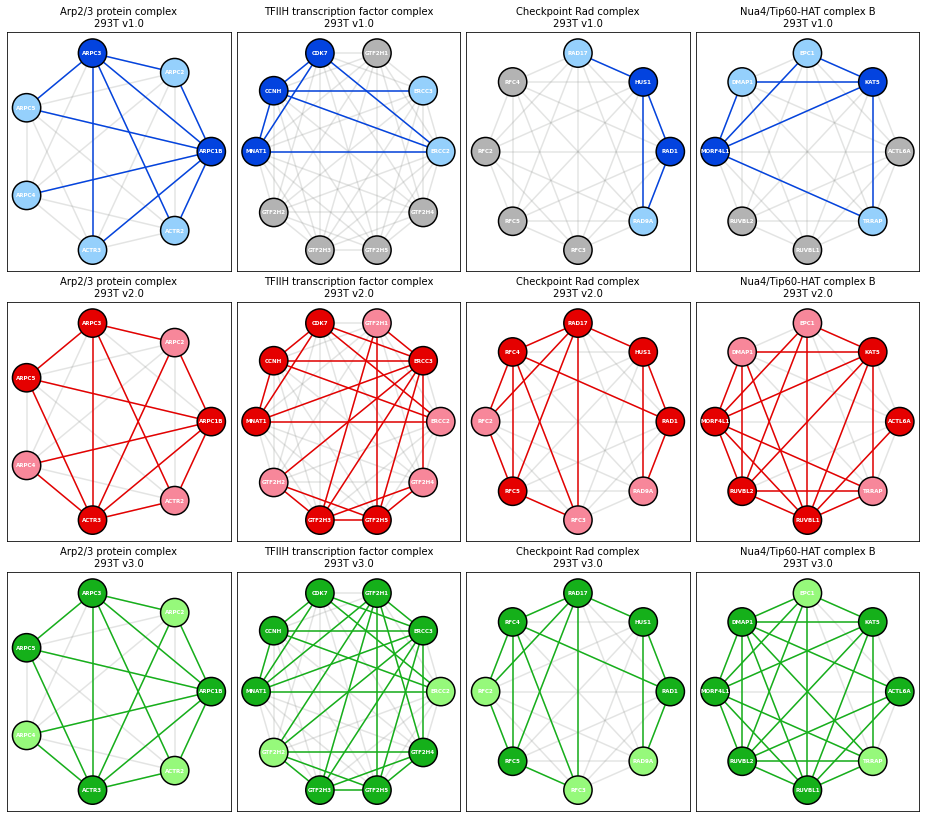

In [97]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
spec.update(wspace=0.01,hspace=0.01) # set the spacing between axes.

# HEK293T 1.0 - create axes objects for HEK293T v1 network
ax_293T_v1_A = fig.add_subplot(spec[0,0])
ax_293T_v1_B = fig.add_subplot(spec[0,1])
ax_293T_v1_C = fig.add_subplot(spec[0,2])
ax_293T_v1_D = fig.add_subplot(spec[0,3])

bp_293T_v1_df = getBioPlex('293T', '1.0') # load PPI data for HEK293T v1

Arp23_node_layout = display_PPI_network_for_complex(ax_293T_v1_A, bp_293T_v1_df, Corum_DF, 27, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue')
TFIIH_node_layout = display_PPI_network_for_complex(ax_293T_v1_B, bp_293T_v1_df, Corum_DF, 1029, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue')
RAD_node_layout = display_PPI_network_for_complex(ax_293T_v1_C, bp_293T_v1_df, Corum_DF, 274, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue')
NuA4_Tip60_node_layout = display_PPI_network_for_complex(ax_293T_v1_D, bp_293T_v1_df, Corum_DF, 787, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:blue', prey_node_color='xkcd:light blue', AP_MS_edge_color='xkcd:blue')

# set titles
ax_293T_v1_A.set_title('Arp2/3 protein complex\n293T v1.0', color = 'black', fontsize = 10)
ax_293T_v1_B.set_title('TFIIH transcription factor complex\n293T v1.0', color = 'black', fontsize = 10)
ax_293T_v1_C.set_title('Checkpoint Rad complex\n293T v1.0', color = 'black', fontsize = 10)
ax_293T_v1_D.set_title('Nua4/Tip60-HAT complex B\n293T v1.0', color = 'black', fontsize = 10)

# HEK293T 2.0 - create axes objects for HEK293T v2 network
ax_293T_v2_E = fig.add_subplot(spec[1,0])
ax_293T_v2_F = fig.add_subplot(spec[1,1])
ax_293T_v2_G = fig.add_subplot(spec[1,2])
ax_293T_v2_H = fig.add_subplot(spec[1,3])

bp_293T_v2_df = getBioPlex('293T', '2.0') # load PPI data for HEK293T v2

Arp23_node_layout = display_PPI_network_for_complex(ax_293T_v2_E, bp_293T_v2_df, Corum_DF, 27, 800, 1.5, node_font_size=5.5, node_pos=Arp23_node_layout)
TFIIH_node_layout = display_PPI_network_for_complex(ax_293T_v2_F, bp_293T_v2_df, Corum_DF, 1029, 800, 1.5, node_font_size=5.5, node_pos=TFIIH_node_layout)
RAD_node_layout = display_PPI_network_for_complex(ax_293T_v2_G, bp_293T_v2_df, Corum_DF, 274, 800, 1.5, node_font_size=5.5, node_pos=RAD_node_layout)
NuA4_Tip60_node_layout = display_PPI_network_for_complex(ax_293T_v2_H, bp_293T_v2_df, Corum_DF, 787, 800, 1.5, node_font_size=5.5, node_pos=NuA4_Tip60_node_layout)

# set titles
ax_293T_v2_E.set_title('Arp2/3 protein complex\n293T v2.0', color = 'black', fontsize = 10)
ax_293T_v2_F.set_title('TFIIH transcription factor complex\n293T v2.0', color = 'black', fontsize = 10)
ax_293T_v2_G.set_title('Checkpoint Rad complex\n293T v2.0', color = 'black', fontsize = 10)
ax_293T_v2_H.set_title('Nua4/Tip60-HAT complex B\n293T v2.0', color = 'black', fontsize = 10)

# HEK293T 3.0 - create axes objects for HEK293T v3 network
ax_293T_v3_I = fig.add_subplot(spec[2,0])
ax_293T_v3_J = fig.add_subplot(spec[2,1])
ax_293T_v3_K = fig.add_subplot(spec[2,2])
ax_293T_v3_L = fig.add_subplot(spec[2,3])

bp_293T_v3_df = getBioPlex('293T', '3.0') # load PPI data for HEK293T v3

Arp23_node_layout = display_PPI_network_for_complex(ax_293T_v3_I, bp_293T_v3_df, Corum_DF, 27, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:green', prey_node_color='xkcd:light green', AP_MS_edge_color='xkcd:green', node_pos=Arp23_node_layout)
TFIIH_node_layout = display_PPI_network_for_complex(ax_293T_v3_J, bp_293T_v3_df, Corum_DF, 1029, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:green', prey_node_color='xkcd:light green', AP_MS_edge_color='xkcd:green', node_pos=TFIIH_node_layout)
RAD_node_layout = display_PPI_network_for_complex(ax_293T_v3_K, bp_293T_v3_df, Corum_DF, 274, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:green', prey_node_color='xkcd:light green', AP_MS_edge_color='xkcd:green', node_pos=RAD_node_layout)
NuA4_Tip60_node_layout = display_PPI_network_for_complex(ax_293T_v3_L, bp_293T_v3_df, Corum_DF, 787, 800, 1.5, node_font_size=5.5, bait_node_color='xkcd:green', prey_node_color='xkcd:light green', AP_MS_edge_color='xkcd:green', node_pos=NuA4_Tip60_node_layout)

# set titles
ax_293T_v3_I.set_title('Arp2/3 protein complex\n293T v3.0', color = 'black', fontsize = 10)
ax_293T_v3_J.set_title('TFIIH transcription factor complex\n293T v3.0', color = 'black', fontsize = 10)
ax_293T_v3_K.set_title('Checkpoint Rad complex\n293T v3.0', color = 'black', fontsize = 10)
ax_293T_v3_L.set_title('Nua4/Tip60-HAT complex B\n293T v3.0', color = 'black', fontsize = 10)

fig = plt.gcf()
fig.set_size_inches(12.75, 11.25)
fig.tight_layout()

# save figure as PNG
fig_out_path = '/n/shared_db/ccb/bioplex/BioPlexPy_testing/figures/network_293T_1.0_VS_293T_2.0_VS_293T_3.0_Fig2_Nature2017.png'
plt.savefig(fig_out_path, bbox_inches='tight', dpi = 300 , transparent = False)
plt.show()